In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Train.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
print("Number of Records:",df.shape[0], "Number of features:",df.shape[1])

Number of Records: 8523 Number of features: 12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.select_dtypes(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [9]:
for i in df.select_dtypes(include='object'):
    print(i)
    print(df[i].value_counts())
    print()

Item_Identifier
FDG33    10
FDW13    10
NCI54     9
FDF52     9
FDT07     9
         ..
FDY43     1
FDK57     1
FDQ60     1
DRF48     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [10]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
item_weight_mean = df.pivot_table(values = "Item_Weight", index = "Item_Identifier")
item_weight_mean.head(2)

,Item_Weight
Item_Identifier,
DRA12,11.60
DRA24,19.35


In [13]:
m_values = df["Item_Weight"].isnull()
m_values.sample(2)

126     False
2663     True
Name: Item_Weight, dtype: bool

In [14]:
for i, item in enumerate(df["Item_Identifier"]):
    if m_values[i]:
        if item in item_weight_mean:
            df["Item_Weight"][i]= item_weight_mean.loc[item]["Item_Weight"]
        else:
            df["Item_Weight"][i]= np.mean(df.Item_Weight)

In [15]:
outlet_mode = df.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
outlet_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
mo=df["Outlet_Size"].isnull()

In [17]:
df.loc[mo,'Outlet_Size']=df.loc[mo,'Outlet_Type'].apply(lambda x: outlet_mode[x])

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
sum(df['Item_Visibility']==0)

526

In [20]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()], inplace=True)

In [21]:
sum(df['Item_Visibility']==0)

0

In [22]:
df['Item_Fat_Content']=df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
df["GItem_type"] = df["Item_Identifier"].apply(lambda x: x[0:2])
df["GItem_type"].head(2)

0    FD
1    DR
Name: GItem_type, dtype: object

In [24]:
df["GItem_type"]=df["GItem_type"].map({'FD':'Food',"NC": 'Non consumable','DR':'Drinks'})
df["GItem_type"].value_counts()

Food              6125
Non consumable    1599
Drinks             799
Name: GItem_type, dtype: int64

In [25]:
df.loc[df['GItem_type']=='Non consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [26]:
df["Outlet_Years"] = 2013 - df['Outlet_Establishment_Year']
df["Outlet_Years"].head(2)

0    14
1     4
Name: Outlet_Years, dtype: int64

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,GItem_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non consumable,26


# Exploratory Data Analysis

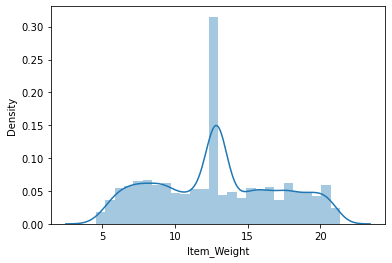

In [28]:
sns.distplot(df["Item_Weight"]);

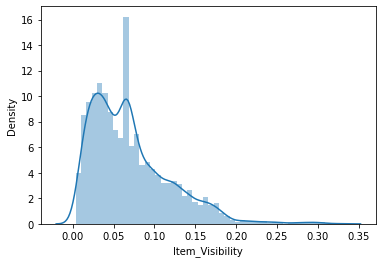

In [29]:
sns.distplot(df["Item_Visibility"]);

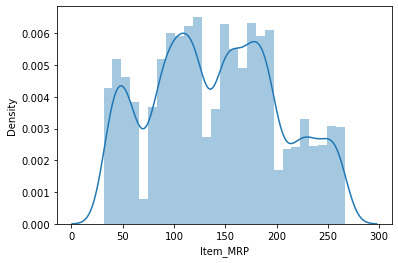

In [30]:
sns.distplot(df["Item_MRP"]);

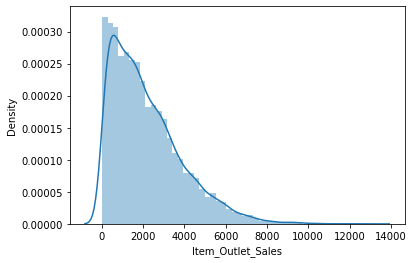

In [31]:
sns.distplot(df["Item_Outlet_Sales"]);

In [32]:
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

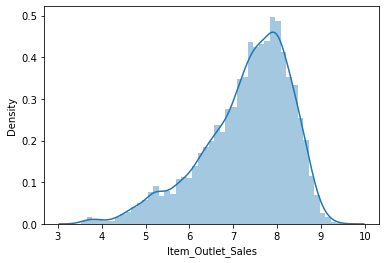

In [33]:
sns.distplot(df["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

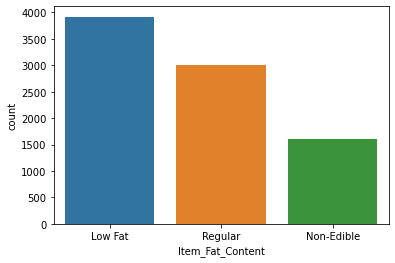

In [34]:
sns.countplot(df['Item_Fat_Content'])

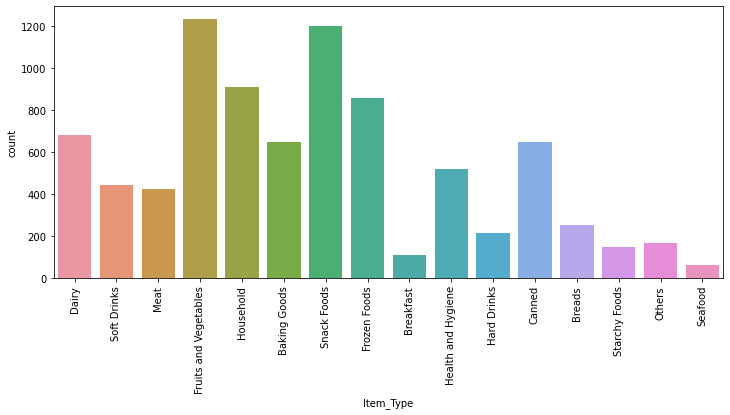

In [35]:
plt.figure(figsize=(12,5))
col = list(df['Item_Type'].unique())
cp = sns.countplot(df['Item_Type'])
cp.set_xticklabels(labels=col,rotation=90);

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

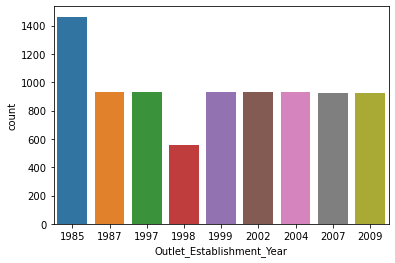

In [36]:
sns.countplot(df["Outlet_Establishment_Year"])

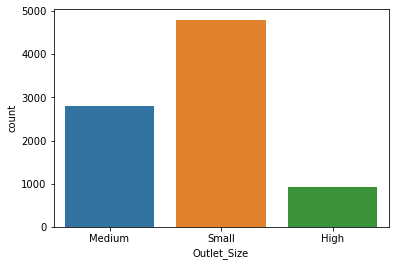

In [37]:
sns.countplot(df["Outlet_Size"]);

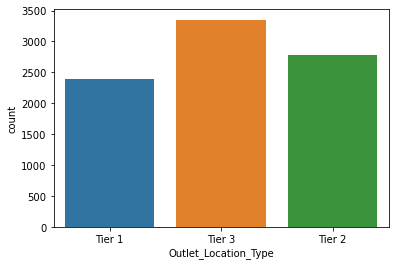

In [38]:
sns.countplot(df["Outlet_Location_Type"]);

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

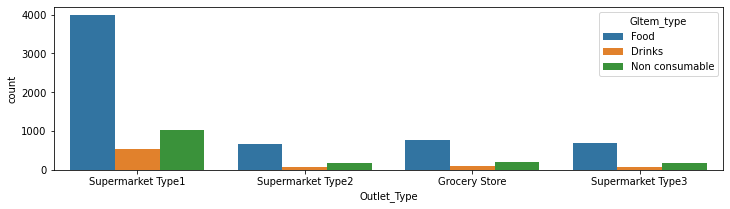

In [39]:
plt.figure(figsize=(12,3))
sns.countplot(x="Outlet_Type",hue='GItem_type',data = df)

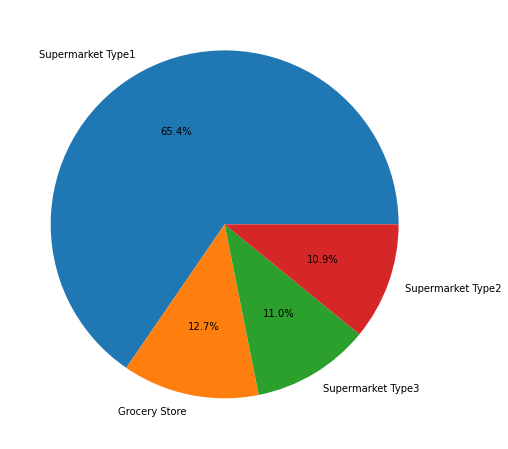

In [40]:
sorted_counts=df['Outlet_Type'].value_counts()
plt.figure(figsize=(12,8))
plt.pie(sorted_counts,labels=['Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'],shadow=False,autopct='%.1f%%')
plt.show()

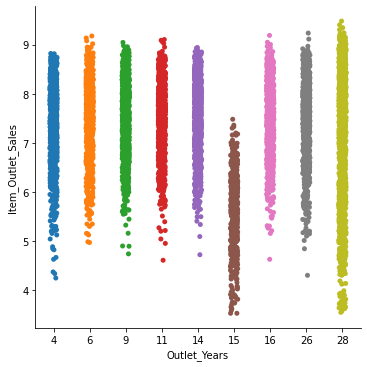

In [41]:
sns.catplot(x="Outlet_Years" , y="Item_Outlet_Sales", data = df)

<AxesSubplot:xlabel='GItem_type', ylabel='Item_Outlet_Sales'>

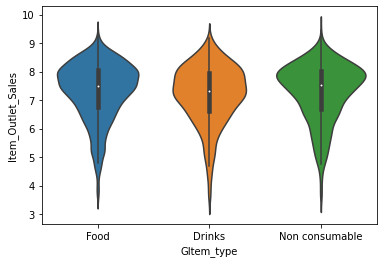

In [42]:
sns.violinplot(x="GItem_type" , y="Item_Outlet_Sales", data = df)

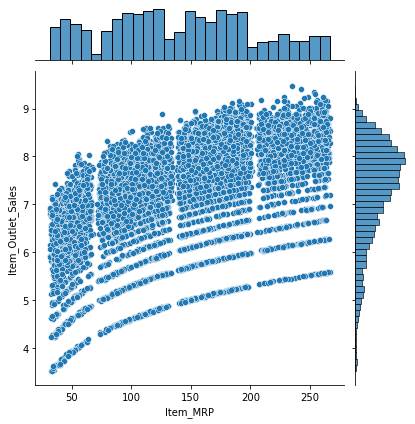

In [43]:
sns.jointplot(x="Item_MRP" , y="Item_Outlet_Sales", data = df)

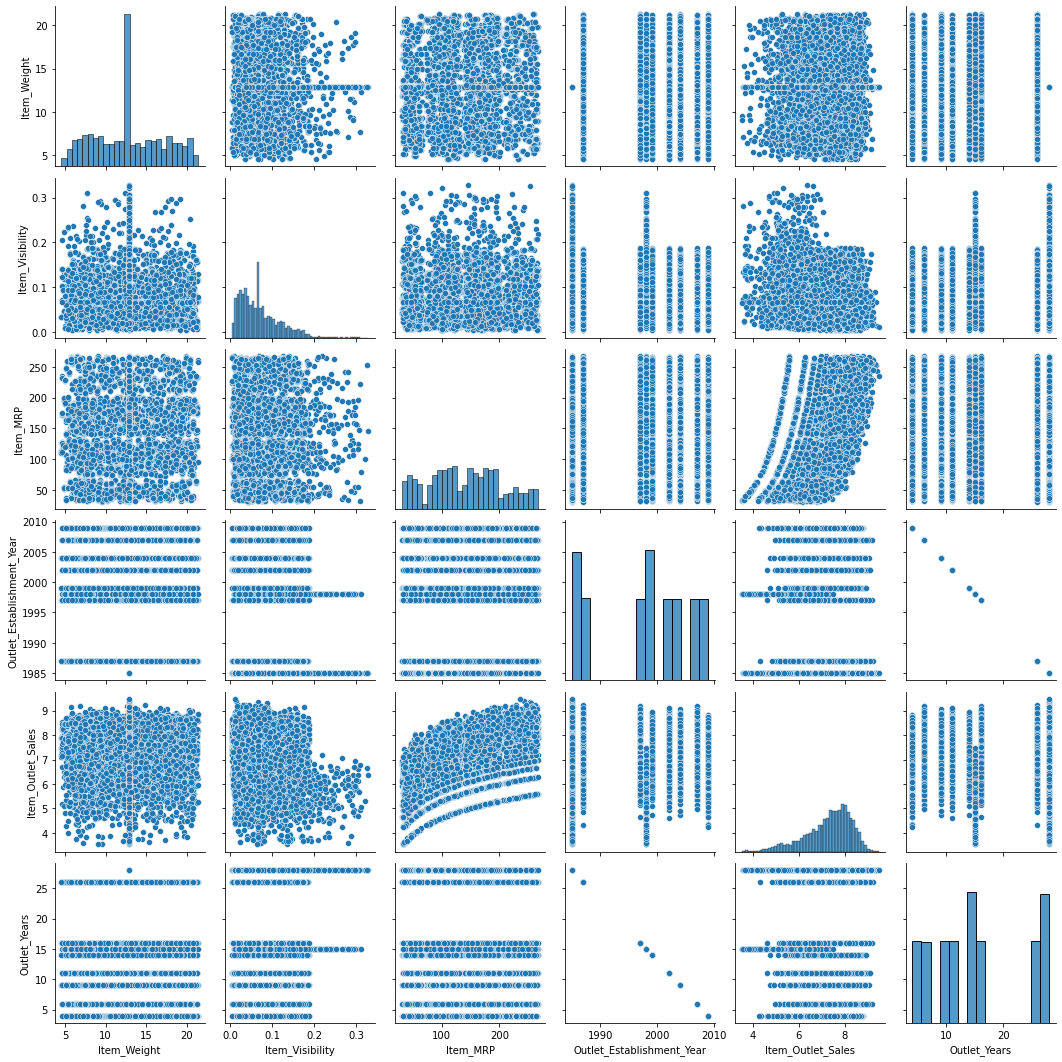

In [44]:
sns.pairplot(df)

# Corelation Matrix

<AxesSubplot:>

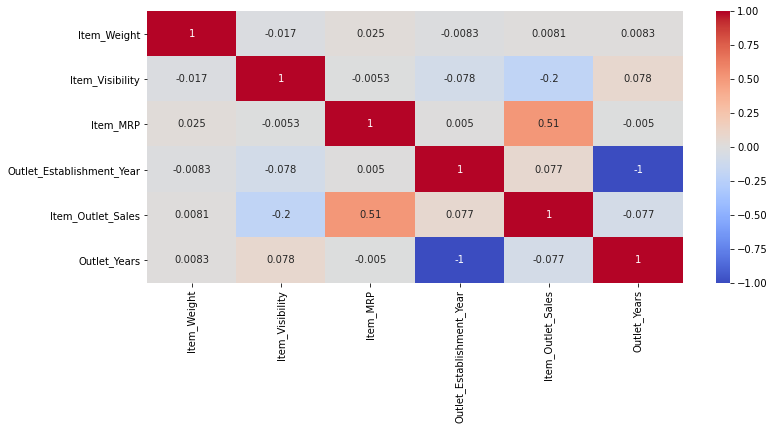

In [45]:
corr = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
for i in df.select_dtypes(include='object'):
    print(i)
    print(df[i].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'Non-Edible']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'Small' 'High']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
GItem_type
['Food' 'Drinks' 'Non consumable']


In [48]:
for i in df.select_dtypes(include='object'):
    df[i] = le.fit_transform(df[i])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  GItem_type                 8523 non-null   int32  
 13  Outlet_Years               8523 non-null   int64

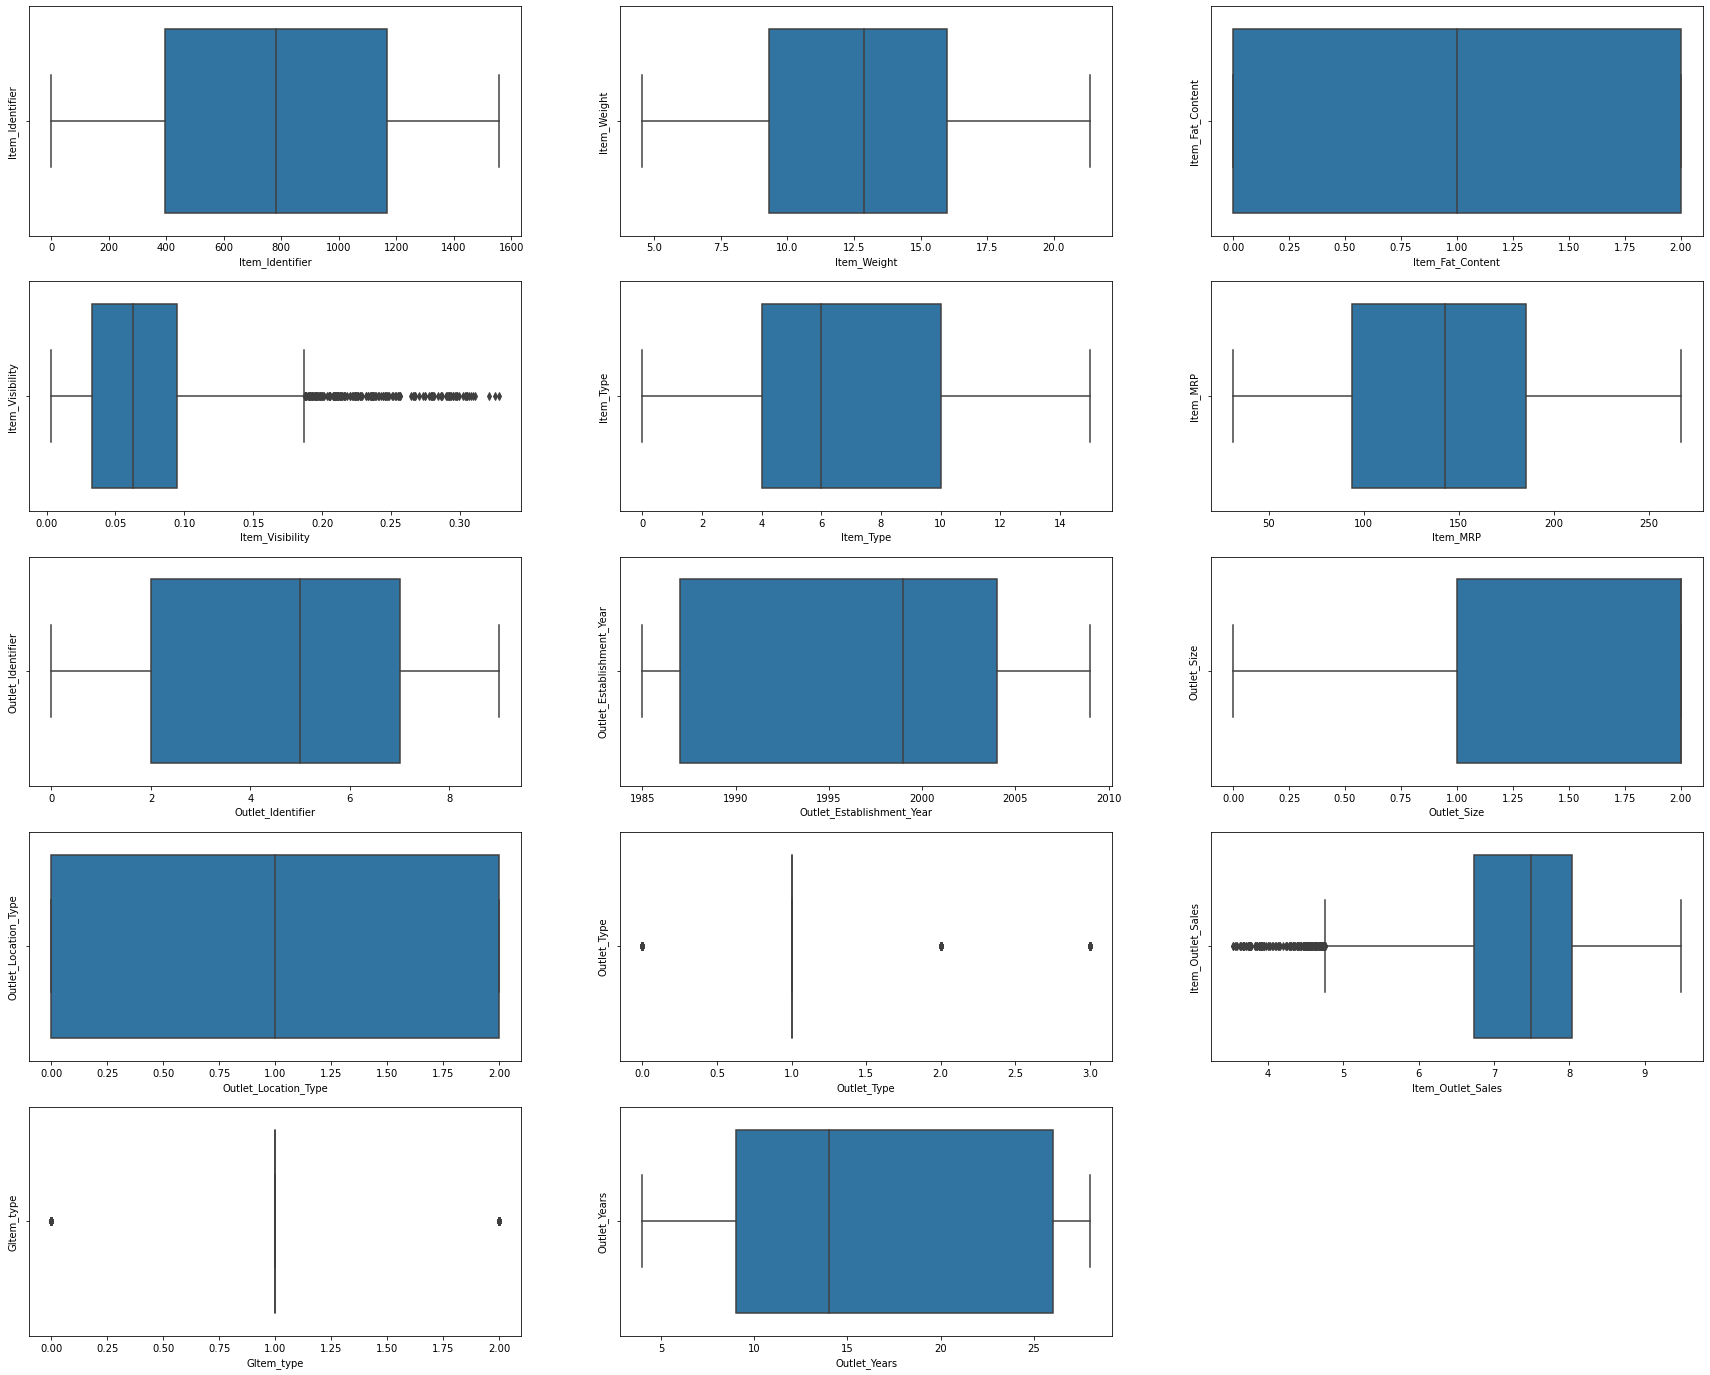

In [50]:
plt.figure(figsize=(30,70))
for i,j in enumerate (df,1):
    plt.subplot(14,3,i)
    sns.boxplot(df[j])
    plt.ylabel(j)
plt.show()

In [51]:
out = df['Item_Visibility']
out_Q1 = out.quantile(0.25)
out_Q3 = out.quantile(0.75)
out_IQR = out_Q3 - out_Q1
out_lowerend = out_Q1 - (1.5 * out_IQR)
out_upperend = out_Q3 + (1.5 * out_IQR)
out_outliers = out[(out < out_lowerend) | (out > out_upperend)]
out_outliers.head(2)

49    0.255395
65    0.195068
Name: Item_Visibility, dtype: float64

In [52]:
df['Item_Visibility'] = np.where(df['Item_Visibility'] < out_lowerend, out_lowerend,
                                np.where(df['Item_Visibility'] > out_upperend, out_upperend, df['Item_Visibility']))

In [53]:
out=[]
def detect_outliers(x):
    thres=3
    mean=np.mean(x)
    sd= np.std(x)
    
    for i in x:
        z_score = (i-mean)/sd
        if np.abs(z_score)>thres:
            out.append(i)
    return out

In [54]:
detect_outliers(df['Item_Visibility'])

[]

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifm

In [56]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF_Values']=[vifm(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [57]:
calculate_vif(df)

,features,VIF_Values
0,Item_Identifier,2.642140
1,Item_Weight,1.005994
2,Item_Fat_Content,1.044054
3,Item_Visibility,1.064808
4,Item_Type,1.009021
5,Item_MRP,1.619478
6,Outlet_Identifier,4.215893
7,Outlet_Establishment_Year,160.122687
8,Outlet_Size,1.803065
9,Outlet_Location_Type,5.479811


# Input Split

In [58]:
xind = df.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
ydep = df['Item_Outlet_Sales']

<AxesSubplot:ylabel='Density'>

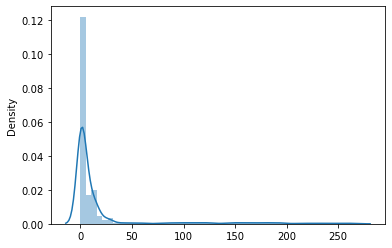

In [59]:
sns.distplot(xind)

In [60]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

In [61]:
xnorm = norm.fit_transform(xind)

In [62]:
from statsmodels.api import OLS

In [239]:
model = OLS(ydep,xind)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          3.430e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                        0.00
Time:                        01:28:14   Log-Likelihood:                         -13260.
No. Observations:                8523   AIC:                                  2.654e+04
Df Residuals:                    8513   BIC:                                  2.661e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Item_Weight              0.0892      0.003     33.125      0.000       0.084       0.094
Item_Fat_Content         0.1204      0.014      8.539      0.000       0.093       0.148
Item_Visibility          2.5188      0.275      9.147      0.000       1.979       3.059
Item_Type                0.0518      0.003     17.978      0.000       0.046       0.057
Item_MRP                 0.0128      0.000     66.814      0.000       0.012       0.013
Outlet_Size              0.8206      0.018     44.830      0.000       0.785       0.857
Outlet_Location_Type     0.1036      0.018      5.813      0.000       0.069       0.139
Outlet_Type              1.0712      0.018     60.837      0.000       1.037       1.106
GItem_type               0.4229      0.024     17.882      0.000       0.377       0.469
Outlet_Years             0.0334      0.001     22.534      0.000       0.031       0.036
==============================================================================
Omnibus:                      132.396   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.011
Skew:                          -0.131   Prob(JB):                     2.85e-20
Kurtosis:                       2.570   Cond. No.                     3.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
from sklearn.decomposition import PCA
pca = PCA()

In [67]:
x_new = pca.fit_transform(xnorm)

In [68]:
x_new

array([[-0.39262083,  0.50597549, -0.59361847, ..., -0.34395457,
        -0.03303684,  1.07304213],
       [ 1.11565447,  1.26677506, -1.24971698, ...,  2.22085087,
        -0.45724255,  0.31874148],
       [-0.35385772,  0.51599745, -1.21491609, ...,  0.15613414,
         0.00409679,  1.07756055],
       ...,
       [-0.80465634, -1.12223921, -0.77564177, ..., -1.07879023,
        -0.07744197, -0.23901331],
       [ 0.81723497, -0.03270536,  0.28067506, ...,  0.41205986,
         0.03464443,  0.78464677],
       [-1.22710129,  2.28406689, -0.84979543, ...,  1.31193343,
         0.62224068,  0.00316242]])

In [69]:
cov = np.cov(xind.T)

In [70]:
ev,evectors = np.linalg.eig(cov)

In [71]:
ev

array([3.87821604e+03, 7.01870499e+01, 1.82685733e+01, 1.72882255e+01,
       1.07320060e+00, 8.11334206e-01, 1.96147725e-03, 3.51678915e-01,
       2.36212724e-01, 2.57344048e-01])

In [72]:
evectors

array([[-1.68799895e-03, -5.69404998e-03,  7.55982834e-01,
         6.54515153e-01,  9.88739688e-04, -1.18176240e-03,
         1.37794246e-04, -1.10352302e-03, -2.09141572e-03,
         7.52406920e-03],
       [-1.23389847e-04,  1.40087223e-04, -9.74713877e-03,
         1.11673595e-02, -5.44009397e-03,  9.87088004e-01,
        -1.67047797e-03, -3.52637972e-03, -1.74676810e-02,
         1.58390597e-01],
       [ 3.93495294e-06, -3.49911526e-04, -3.96556253e-04,
         1.75612990e-04,  5.50960698e-03,  9.21103978e-04,
         9.99883279e-01,  9.48905638e-03, -9.75269117e-03,
         4.09350868e-03],
       [-2.21764088e-03,  3.16539558e-03,  6.54476873e-01,
        -7.55925779e-01,  1.00531096e-03,  1.45559627e-02,
         3.59923756e-04,  4.81058734e-05, -2.44039323e-04,
         2.86769380e-03],
       [-9.99995835e-01, -6.84621128e-04, -2.72956854e-03,
         5.64657755e-04, -1.32486195e-06, -1.95501934e-04,
         1.66594615e-06, -2.30750008e-05, -3.29223207e-05,
         2.

In [73]:
expvar = pca.explained_variance_ratio_

In [74]:
expvar

array([0.20496911, 0.12069622, 0.11329318, 0.10600384, 0.09795528,
       0.09509432, 0.09038118, 0.07848726, 0.05429048, 0.03882911])

In [75]:
np.cumsum(expvar)

array([0.20496911, 0.32566533, 0.43895851, 0.54496236, 0.64291763,
       0.73801196, 0.82839314, 0.9068804 , 0.96117089, 1.        ])

In [76]:
PCA = PCA(n_components=9)

In [77]:
xnew = PCA.fit_transform(xnorm)

# Model Training

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error as mse

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(xnorm,ydep,train_size=0.8,random_state=8)

In [80]:
def train(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print("Model Score:", model.score(xtest,ytest))
    print("Mean Squared Error:", mse(ytest,ypred))
    print("Root Mean Squared Error:", np.sqrt(mse(ytest,ypred)))

In [84]:
lmodel = LinearRegression()
lmodel.fit(xtrain,ytrain)
print("Model: Linear Regression")
train(lmodel,xtrain,xtest,ytrain,ytest)
print('Model intercept: ', lmodel.intercept_)
print('Model coefficient: ', lmodel.coef_)    

Model: Linear Regression
Model Score: 0.6034641347514613
Mean Squared Error: 0.43622180744610084
Root Mean Squared Error: 0.6604708982582812
Model intercept:  7.295345568614751
Model coefficient:  [-0.00121959  0.00279284 -0.06417843  0.00233034  0.5104429  -0.20971616
 -0.27632973  0.5396559  -0.00587039 -0.19831476]


In [85]:
lrmodel = "Linear Regression"
lmodel_Score = 0.6034641347514613
lmse = 0.43622180744610084
lrmse = 0.6604708982582812

In [86]:
lcom = pd.DataFrame({'Actual':ytest,'Predicted':lmodel.predict(xtest)})
lcom

,Actual,Predicted
2317,8.193205,8.370429
6130,8.044608,7.321450
1331,7.839013,8.134281
781,7.267156,6.442345
4181,7.589384,7.757900
...,...,...
5295,6.643792,7.316279
3387,7.256877,7.632238
7341,7.374582,7.997989
1455,8.680785,8.164535


<AxesSubplot:>

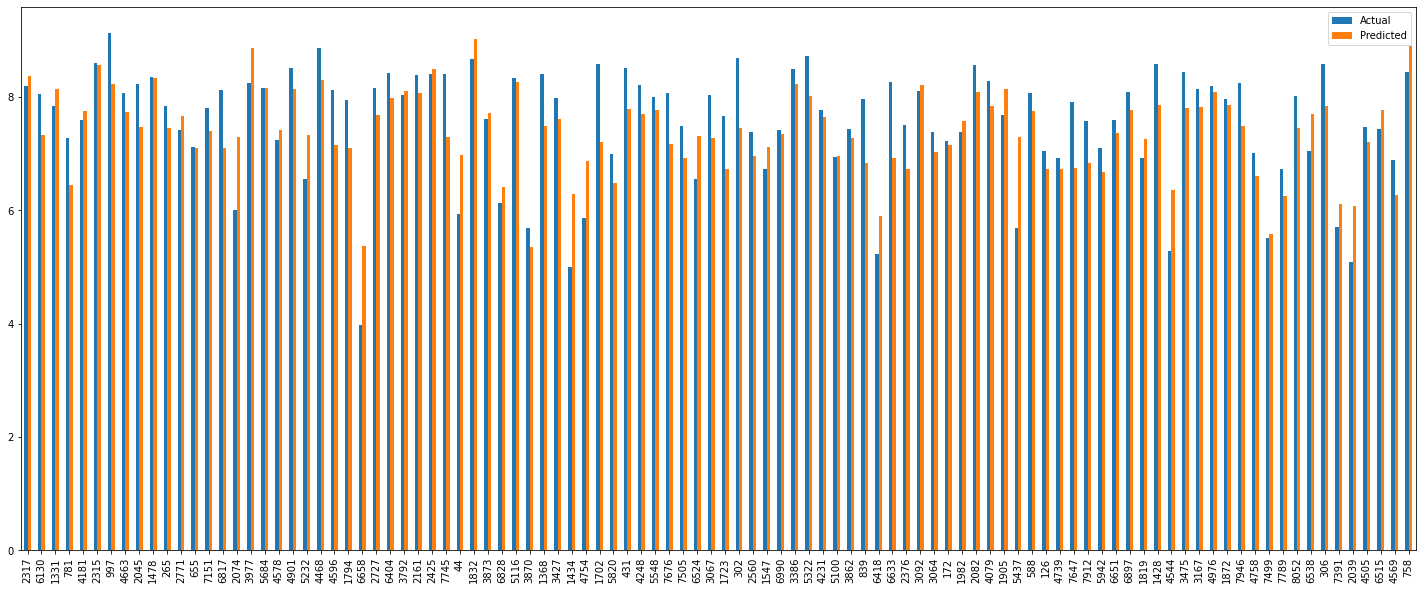

In [87]:
plcom = lcom.head(100)
plcom.plot(kind='bar',figsize=(25,10))

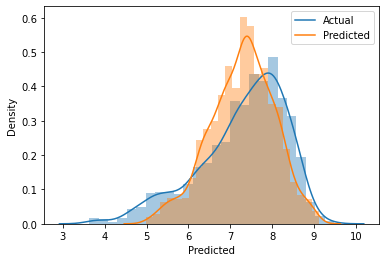

In [88]:
sns.distplot(lcom['Actual'])
sns.distplot(lcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [93]:
rmodel = Ridge(alpha=50,max_iter=100)
rmodel.fit(xtrain,ytrain)
print("Model: Ridge L2")
train(rmodel,xtrain,xtest,ytrain,ytest)
print('Model intercept: ', rmodel.intercept_)
print('Model coefficient: ',rmodel.coef_)

Model: Ridge L2
Model Score: 0.6027927186388828
Mean Squared Error: 0.43696041995469165
Root Mean Squared Error: 0.6610298177500706
Model intercept:  7.295404200937386
Model coefficient:  [-0.00117898  0.00286774 -0.06503302  0.00237106  0.50674067 -0.20621186
 -0.27018019  0.53369038 -0.00582978 -0.1951606 ]


In [94]:
rModel= "Ridge L2"
rscore = 0.6027927186388828
rmse = 0.43696041995469165
rrmse = 0.6610298177500706

In [95]:
rcom = pd.DataFrame({'Actual':ytest,'Predicted':rmodel.predict(xtest)})
rcom

,Actual,Predicted
2317,8.193205,8.352779
6130,8.044608,7.320647
1331,7.839013,8.127248
781,7.267156,6.449558
4181,7.589384,7.748999
...,...,...
5295,6.643792,7.318841
3387,7.256877,7.629356
7341,7.374582,7.986140
1455,8.680785,8.158892


<AxesSubplot:>

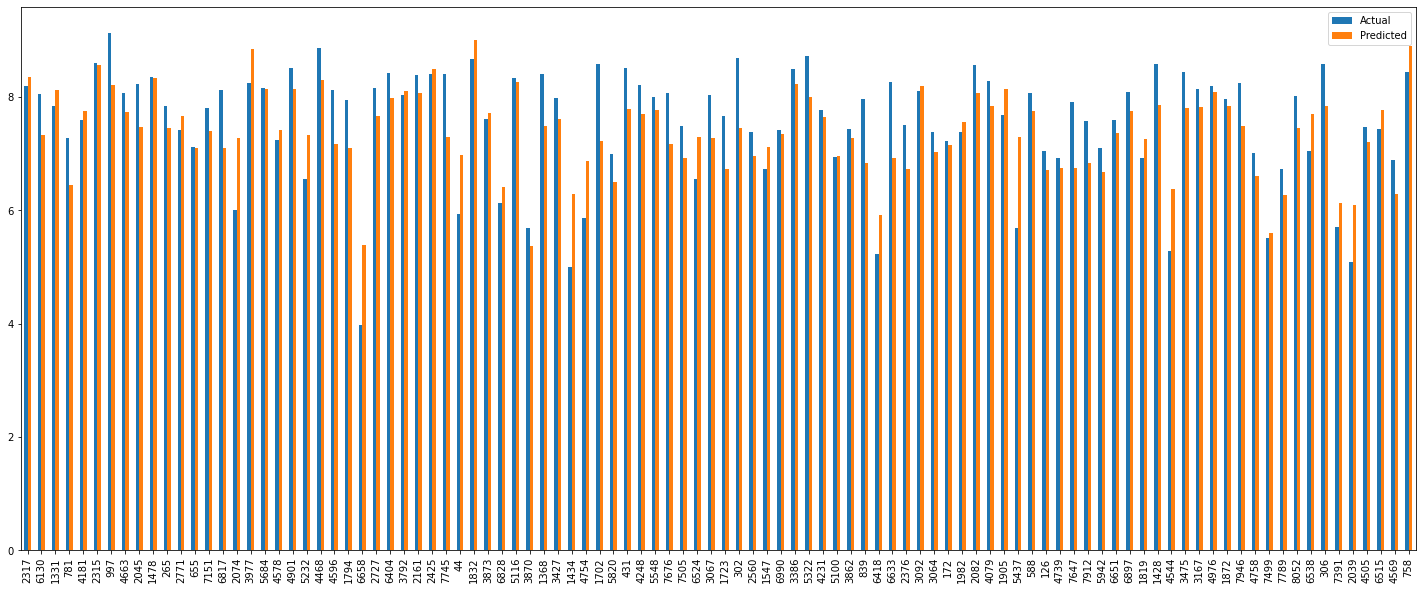

In [96]:
prcom = rcom.head(100)
prcom.plot(kind='bar',figsize=(25,10))

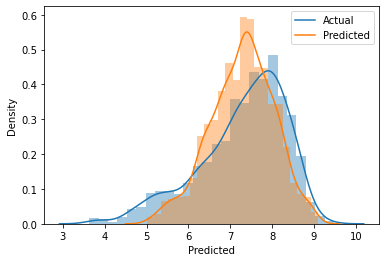

In [97]:
sns.distplot(rcom['Actual'])
sns.distplot(rcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [98]:
from sklearn.linear_model import SGDRegressor

In [99]:
smodel = SGDRegressor()
smodel.fit(xtrain,ytrain)
print("Model: SGD")
train(smodel,xtrain,xtest,ytrain,ytest)
print('Model intercept: ', smodel.intercept_)
print('Model coefficient: ',smodel.coef_)

Model: SGD
Model Score: 0.6023907261029963
Mean Squared Error: 0.43740264454508115
Root Mean Squared Error: 0.6613642298651183
Model intercept:  [7.29589527]
Model coefficient:  [ 0.00381036  0.01396664 -0.05561997  0.01563915  0.511771   -0.20349608
 -0.27591043  0.53112685  0.00956078 -0.20239167]


In [100]:
sModel= "SGD"
sscore= 0.6023190149056382
smse = 0.4374815327135096
srmse = 0.6614238676624163

In [101]:
scom = pd.DataFrame({'Actual':ytest,'Predicted':smodel.predict(xtest)})
scom

,Actual,Predicted
2317,8.193205,8.440192
6130,8.044608,7.314827
1331,7.839013,8.195349
781,7.267156,6.479842
4181,7.589384,7.755281
...,...,...
5295,6.643792,7.310110
3387,7.256877,7.652296
7341,7.374582,7.934894
1455,8.680785,8.170764


<AxesSubplot:>

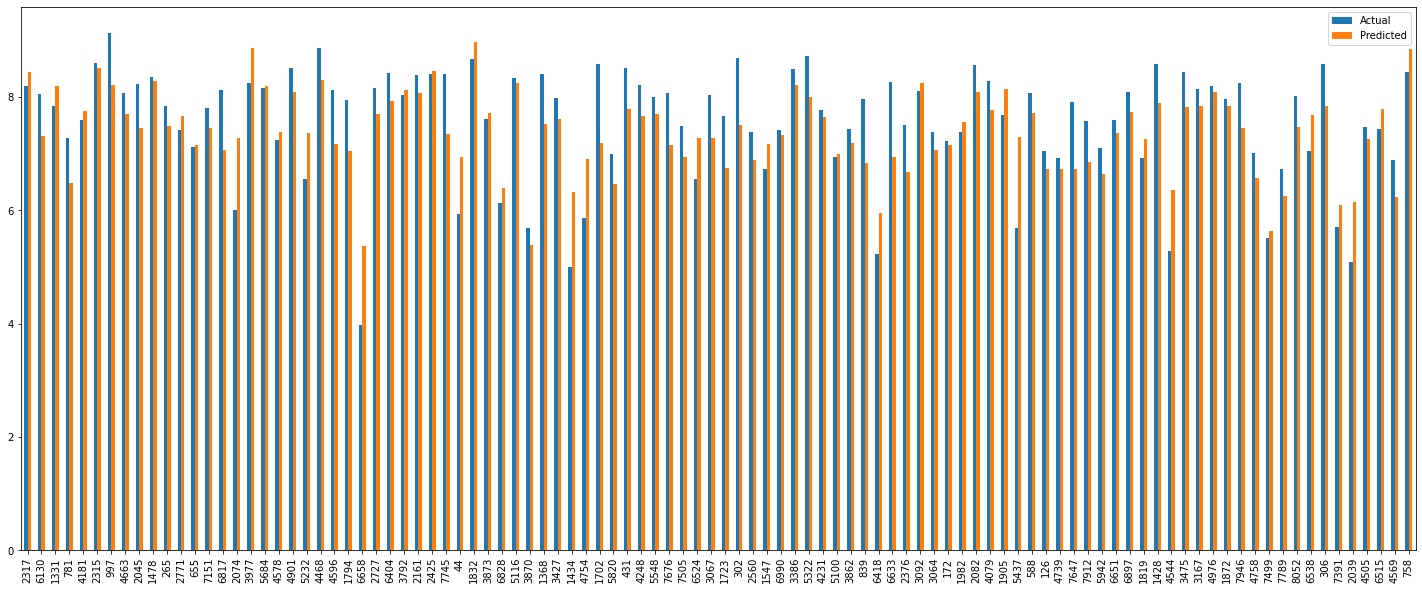

In [102]:
sgcom = scom.head(100)
sgcom.plot(kind='bar',figsize=(25,10))

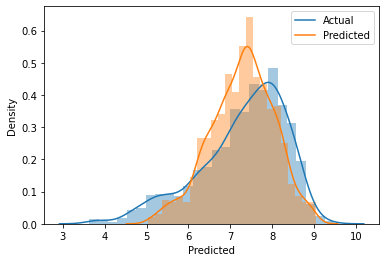

In [103]:
sns.distplot(scom['Actual'])
sns.distplot(scom['Predicted'])
plt.legend(['Actual','Predicted'])

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
dtmodel = DecisionTreeRegressor()
print("Model: Decision Tree")
train(dtmodel,xtrain,xtest,ytrain,ytest)
print

Model: Decision Tree
Model Score: 0.48921087689064546
Mean Squared Error: 0.5619097136823054
Root Mean Squared Error: 0.7496063724931274


<function print>

In [107]:
dtModel= "Decision Tree"
dtscore= 0.48921087689064546
dtmse = 0.5619097136823054
dtrmse = 0.7496063724931274

In [108]:
dtcom = pd.DataFrame({'Actual':ytest,'Predicted':dtmodel.predict(xtest)})
dtcom

,Actual,Predicted
2317,8.193205,8.824112
6130,8.044608,8.272801
1331,7.839013,8.524059
781,7.267156,5.186092
4181,7.589384,7.783450
...,...,...
5295,6.643792,7.188874
3387,7.256877,7.356894
7341,7.374582,7.476116
1455,8.680785,8.512219


<AxesSubplot:>

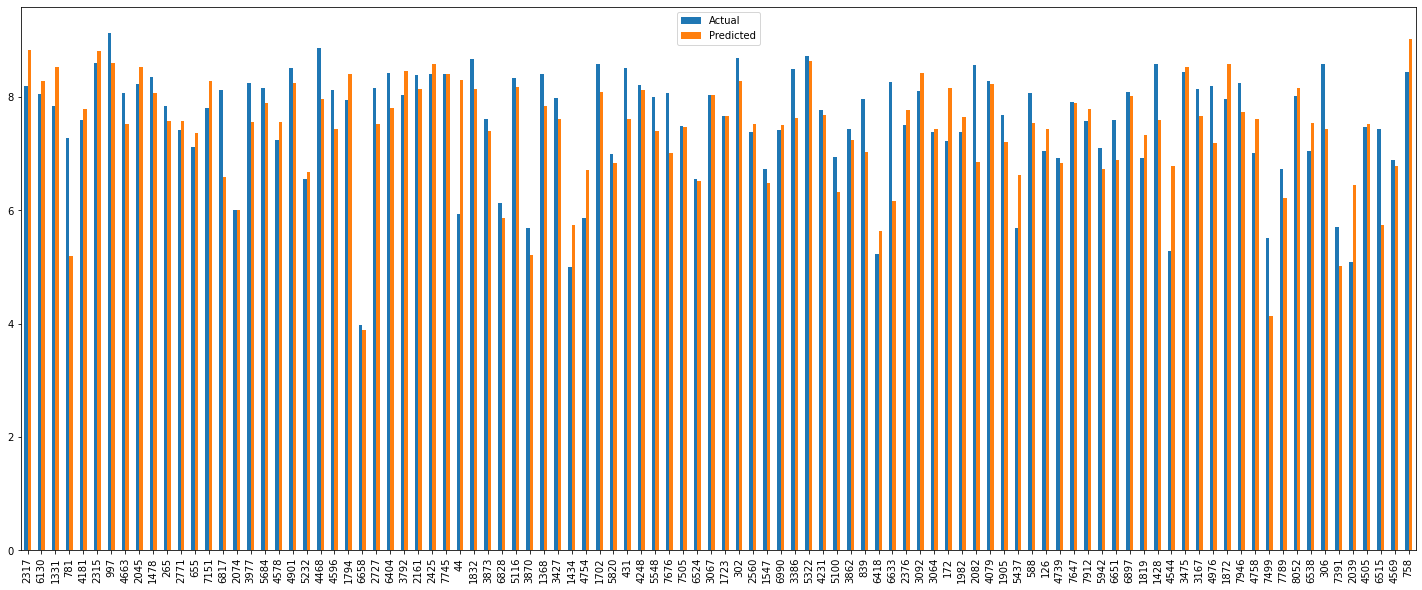

In [109]:
pdtcom = dtcom.head(100)
pdtcom.plot(kind='bar',figsize=(25,10))

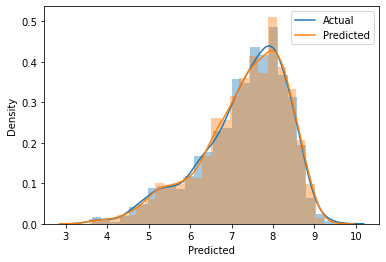

In [110]:
sns.distplot(dtcom['Actual'])
sns.distplot(dtcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),"max_features":('log2','auto','sqrt'),
            'min_samples_split':(2,4,6)}

In [113]:
dt=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=parameters,cv=5,random_state=3)

In [114]:
dt.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)},
                   random_state=3)

In [115]:
dt.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features='sqrt')

In [116]:
hdtmodel = DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_split=6,random_state=8)

In [117]:
print("Model: Decision Tree")
train(hdtmodel,xtrain,xtest,ytrain,ytest)

Model: Decision Tree
Model Score: 0.7029371068080754
Mean Squared Error: 0.32679342160419345
Root Mean Squared Error: 0.5716584833658934


In [118]:
hdtModel = "Tuned Decision Tree"
hdtscore = 0.7029371068080754
hdtmse = 0.32679342160419345
hdtrmse = 0.5716584833658934

In [119]:
hdtcom = pd.DataFrame({'Actual':ytest,'Predicted':hdtmodel.predict(xtest)})
hdtcom

,Actual,Predicted
2317,8.193205,8.263093
6130,8.044608,7.729395
1331,7.839013,8.263093
781,7.267156,6.712613
4181,7.589384,7.609329
...,...,...
5295,6.643792,7.226399
3387,7.256877,7.261340
7341,7.374582,7.729395
1455,8.680785,8.338724


<AxesSubplot:>

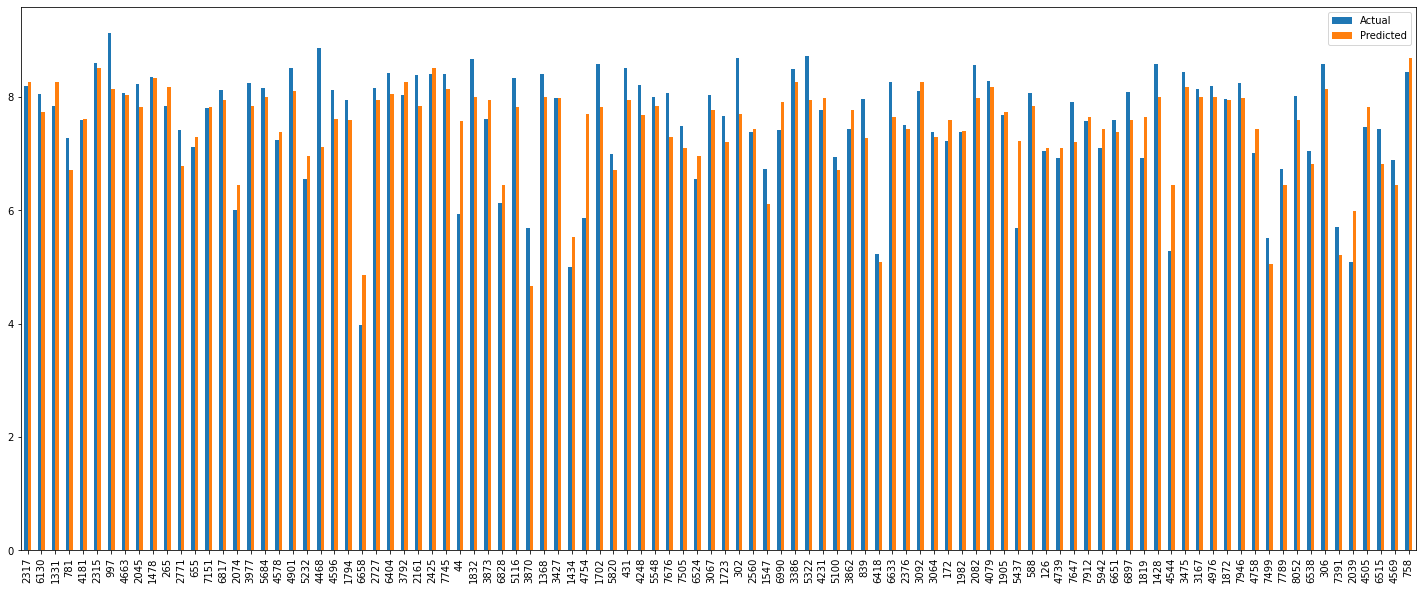

In [120]:
hpdtcom = hdtcom.head(100)
hpdtcom.plot(kind='bar',figsize=(25,10))

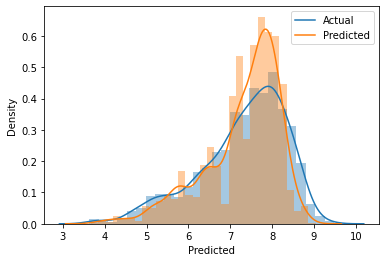

In [121]:
sns.distplot(hdtcom['Actual'])
sns.distplot(hdtcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rfmodel = RandomForestRegressor(random_state=6)
print("Model: Random Forest")
train(rfmodel,xtrain,xtest,ytrain,ytest)

Model: Random Forest
Model Score: 0.7237461881426055
Mean Squared Error: 0.30390173420196526
Root Mean Squared Error: 0.551272831002912


In [124]:
rfModel= "Random Forest"
rfscore = 0.7237461881426055
rfmse = 0.30390173420196526
rfrmse = 0.551272831002912

In [125]:
rfcom = pd.DataFrame({'Actual':ytest,'Predicted':rfmodel.predict(xtest)})
rfcom

,Actual,Predicted
2317,8.193205,7.968788
6130,8.044608,7.864087
1331,7.839013,8.220690
781,7.267156,6.578621
4181,7.589384,7.590050
...,...,...
5295,6.643792,6.827701
3387,7.256877,7.426872
7341,7.374582,7.721515
1455,8.680785,8.326263


<AxesSubplot:>

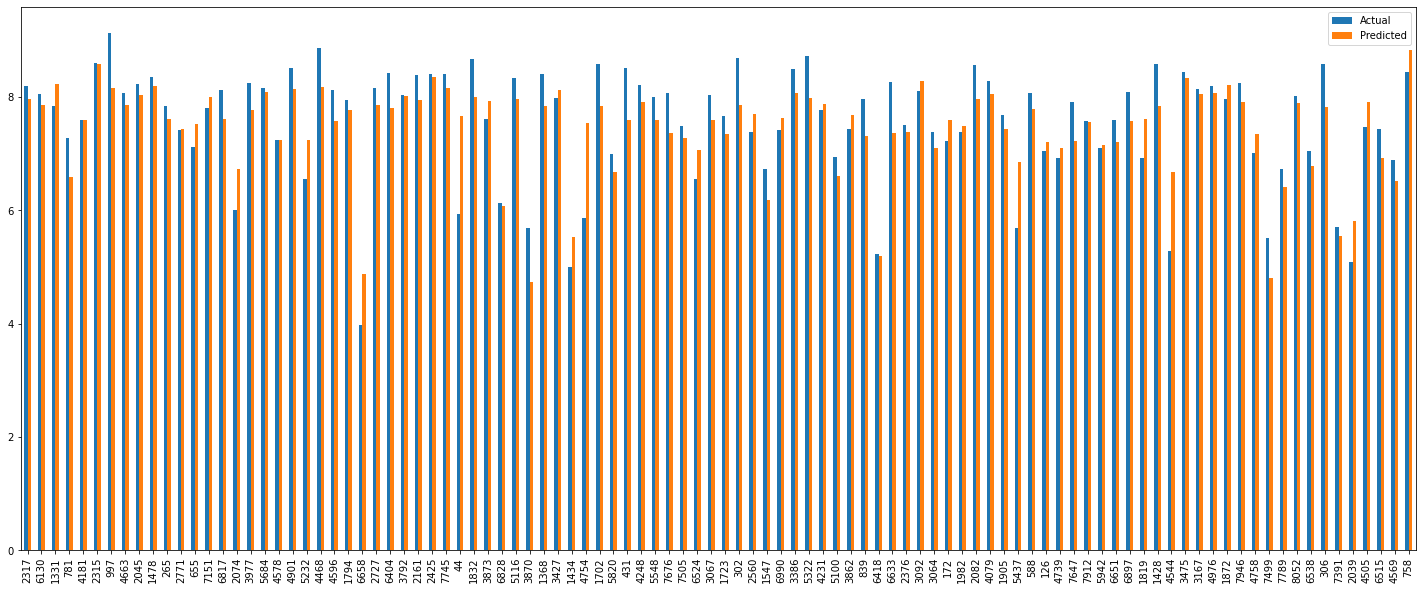

In [126]:
prfcom = rfcom.head(100)
prfcom.plot(kind='bar',figsize=(25,10))

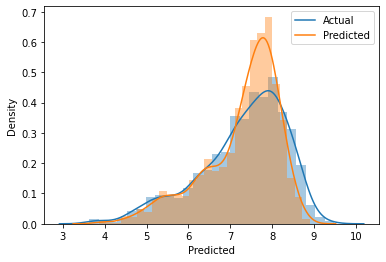

In [127]:
sns.distplot(rfcom['Actual'])
sns.distplot(rfcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [128]:
param={'n_estimators':(200,300,400,500),'max_features':('auto','sqrt','log2'), 'min_samples_split':(2,4,6),'random_state':(0,1,2,3,4,5,6,7,8,9,10,11)}
param

{'n_estimators': (200, 300, 400, 500),
 'max_features': ('auto', 'sqrt', 'log2'),
 'min_samples_split': (2, 4, 6),
 'random_state': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)}

In [129]:
RF=RandomizedSearchCV(RandomForestRegressor(),param_distributions=param,cv=5,random_state=3)

In [130]:
RF.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (200, 300, 400, 500),
                                        'random_state': (0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11)},
                   random_state=3)

In [131]:
RF.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=500, random_state=3)

In [132]:
model_hp=RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=500, random_state=3)
model_hp.fit(xtrain,ytrain)
ypred_hp = model_hp.predict(xtest)

In [231]:
print("score:",model_hp.score(xtest,ytest))
print("MSE:",mse(ytest,ypred_hp))
print("RMSE:",np.sqrt(mse(ytest,ypred_hp)) )

score: 0.7380949136373186
MSE: 0.28811696536162706
RMSE: 0.5367652795790978


In [136]:
hrfmodel = "Tuned Random Forest"
hrfscore = 0.7380949136373186
hrfmse = 0.28811696536162706
hrfrmse =0.5367652795790978

In [137]:
rfhpcom = pd.DataFrame({'Actual':ytest,'Predicted':ypred_hp})
rfhpcom

,Actual,Predicted
2317,8.193205,8.086267
6130,8.044608,7.634148
1331,7.839013,8.046391
781,7.267156,6.634332
4181,7.589384,7.482855
...,...,...
5295,6.643792,7.035113
3387,7.256877,7.365816
7341,7.374582,7.765130
1455,8.680785,8.106505


<AxesSubplot:>

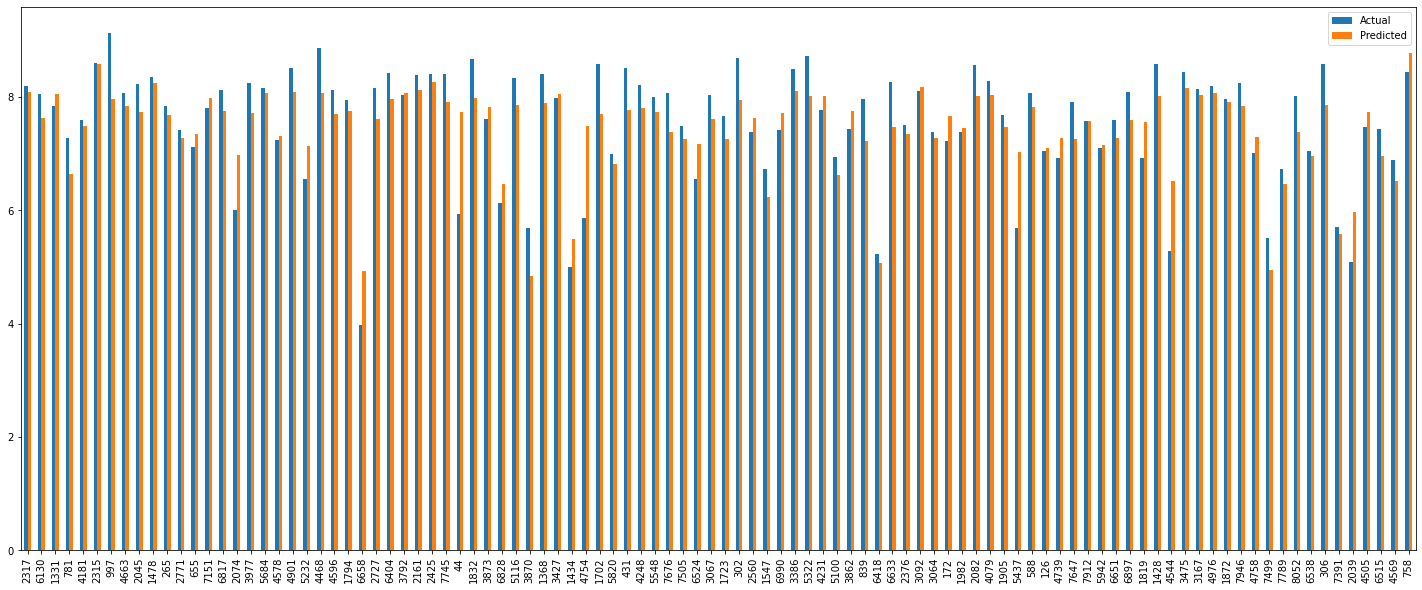

In [138]:
prfhpcom = rfhpcom.head(100)
prfhpcom.plot(kind='bar',figsize=(25,10))

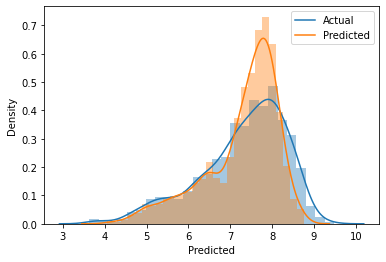

In [139]:
sns.distplot(rfhpcom['Actual'])
sns.distplot(rfhpcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [140]:
from sklearn.ensemble import AdaBoostRegressor

In [190]:
adamodel = AdaBoostRegressor(random_state=34)
print("Model: AdaBoost")
train(adamodel,xtrain,xtest,ytrain,ytest)

Model: AdaBoost
Model Score: 0.7061619273907764
Mean Squared Error: 0.3232458558313131
Root Mean Squared Error: 0.5685471447745676


In [191]:
amodel = "AdaBoost"
ascore = 0.7061619273907764
amse = 0.3232458558313131
armse = 0.5685471447745676

In [192]:
adacom = pd.DataFrame({'Actual':ytest,'Predicted':adamodel.predict(xtest)})
adacom

,Actual,Predicted
2317,8.193205,7.938457
6130,8.044608,7.557943
1331,7.839013,7.938457
781,7.267156,6.489051
4181,7.589384,7.402006
...,...,...
5295,6.643792,6.663733
3387,7.256877,7.205466
7341,7.374582,7.557943
1455,8.680785,7.791731


<AxesSubplot:>

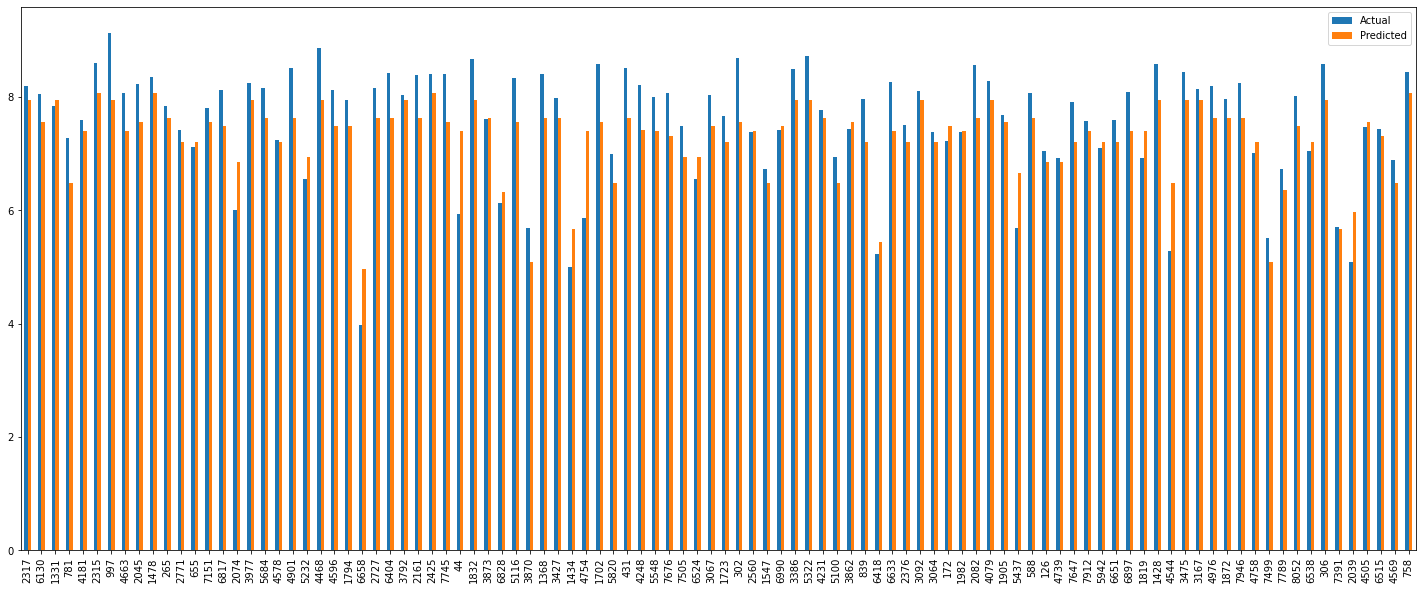

In [193]:
padacom = adacom.head(100)
padacom.plot(kind='bar',figsize=(25,10))

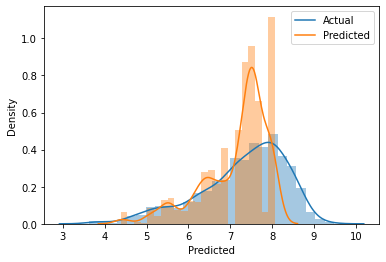

In [194]:
sns.distplot(adacom['Actual'])
sns.distplot(adacom['Predicted'])
plt.legend(['Actual','Predicted'])

In [195]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [196]:
knn = KNeighborsRegressor(n_neighbors=93, metric = "euclidean")

In [197]:
df.shape

(8523, 14)

In [198]:
np.sqrt(8523)

92.32009532057471

In [199]:
kmodel = knn.fit(xtrain,ytrain)

In [200]:
kpred = kmodel.predict(xtest)

In [201]:
kmodel.score(xtest,ytest)

0.6149556947959527

In [202]:
mse(ytest,kpred)

0.4235801537337904

In [203]:
np.sqrt(0.4235801537337904)

0.6508303571083561

In [204]:
knmodel = "KNN"
knscore = 0.6149556947959527
knmse = 0.4235801537337904
knrmse =0.6508303571083561

In [232]:
knncom = pd.DataFrame({'Actual':ytest,'Predicted':kmodel.predict(xtest)})
knncom

,Actual,Predicted
2317,8.193205,7.805425
6130,8.044608,7.627099
1331,7.839013,7.879295
781,7.267156,6.966959
4181,7.589384,7.582180
...,...,...
5295,6.643792,7.765417
3387,7.256877,7.238566
7341,7.374582,7.754372
1455,8.680785,8.179267


<AxesSubplot:>

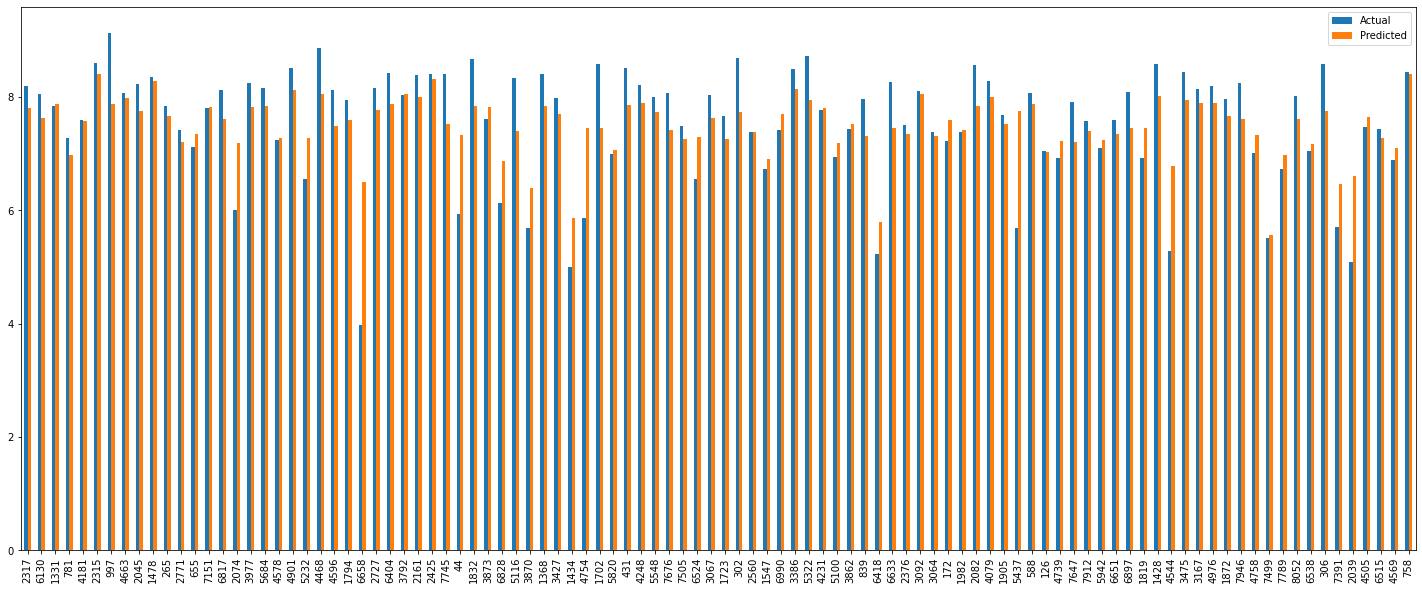

In [237]:
pknncom = knncom.head(100)
pknncom.plot(kind='bar',figsize=(25,10))

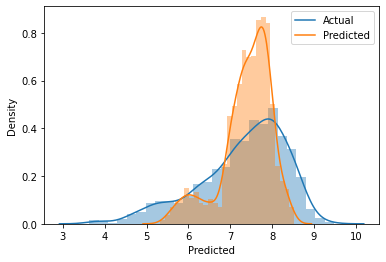

In [238]:
sns.distplot(knncom['Actual'])
sns.distplot(knncom['Predicted'])
plt.legend(['Actual','Predicted'])

In [205]:
from sklearn.svm import SVR

In [223]:
svmodel = SVR()
svmodel.fit(xtrain,ytrain)
svpred = svmodel.predict(xtest)

In [224]:
svModel = "SVR"
svscore = svmodel.score(xtest,ytest)
svmse = mse(ytest,svpred)
svrmse = np.sqrt(svmse)

In [233]:
svcom = pd.DataFrame({'Actual':ytest,'Predicted':svmodel.predict(xtest)})
svcom

,Actual,Predicted
2317,8.193205,8.582842
6130,8.044608,7.505195
1331,7.839013,8.568128
781,7.267156,6.811929
4181,7.589384,7.603798
...,...,...
5295,6.643792,7.166739
3387,7.256877,7.258462
7341,7.374582,8.127460
1455,8.680785,8.328966


<AxesSubplot:>

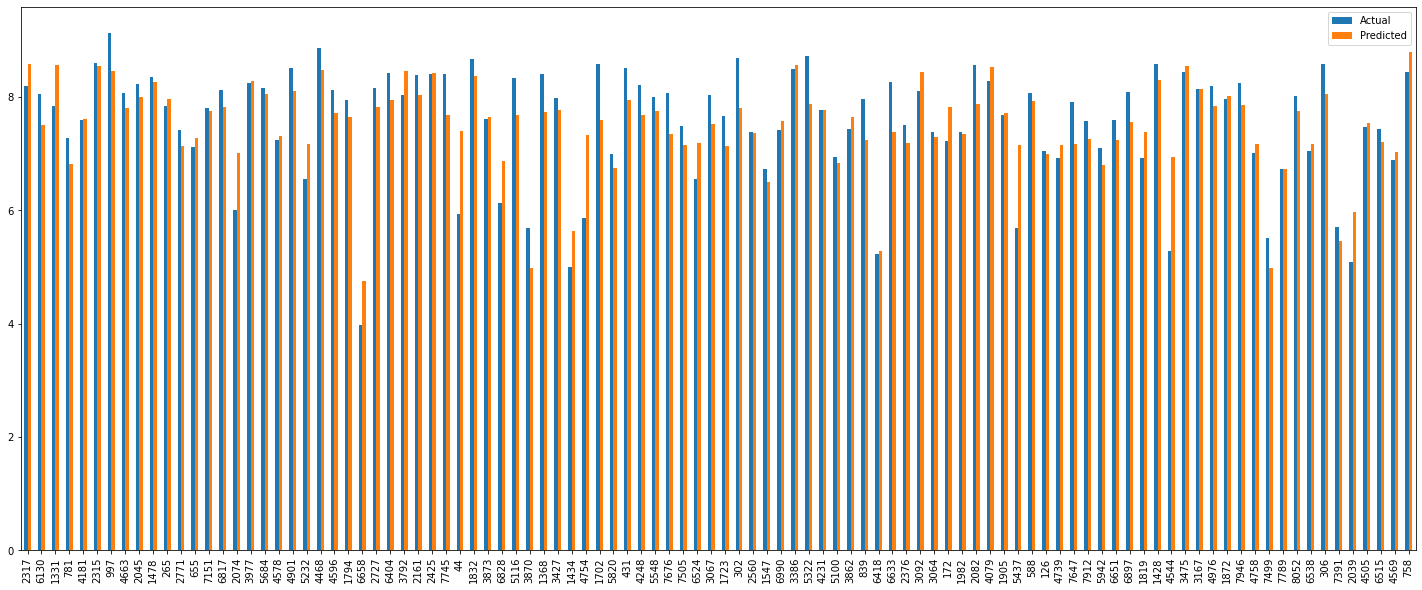

In [236]:
psvcom = svcom.head(100)
psvcom.plot(kind='bar',figsize=(25,10))

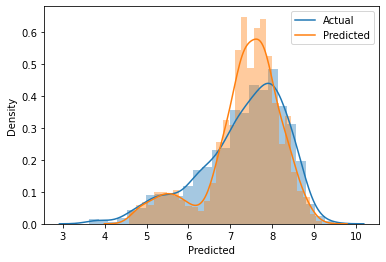

In [235]:
sns.distplot(svcom['Actual'])
sns.distplot(svcom['Predicted'])
plt.legend(['Actual','Predicted'])

In [209]:
kernel = ["linear","rbf","poly","sigmoid"]

In [212]:
for i in kernel:
    smodel = SVR(kernel=i)
    smodel.fit(xtrain,ytrain)
    spred = smodel.predict(xtest)
    print("kernel",i)
    print(smodel.score(xtest,ytest))
    print(mse(ytest,spred))
    print(np.sqrt(mse(ytest,spred)))

kernel linear
0.5951167823581507
0.44540457618788215
0.667386376987036
kernel rbf
0.7406943573039391
0.2852573652245833
0.5340949028258772
kernel poly
0.7156810993937318
0.31277398990332983
0.5592620047020268
kernel sigmoid
-544.5184731737177
600.1148325232188
24.497241324753666


In [213]:
hsvmodel = "RBF kernel SVR"
hsvscore = 0.7406943573039391
hsvmse = 0.2852573652245833
hsvrmse =0.5340949028258772

In [225]:
compare = pd.DataFrame({"Model":[lrmodel,rModel,sModel,dtModel,hdtModel,rfModel,hrfmodel,amodel,knmodel,svModel,hsvmodel],
                        "Score":[lmodel_Score,rscore,sscore,dtscore,hdtscore,rfscore,hrfscore,ascore,knscore,svscore,hsvscore],
                        "Mean Squared Error":[lmse,rmse,smse,dtmse,hdtmse,rfmse,hrfmse,amse,knmse,svmse,hsvmse],
                        "Root Mean Squared Error":[lrmse,rrmse,srmse,dtrmse,hdtrmse,rfrmse,hrfrmse,armse,knrmse,svrmse,hsvrmse]})

In [226]:
compare.set_index("Model")

,Score,Mean Squared Error,Root Mean Squared Error
Model,,,
Linear Regression,0.603464,0.436222,0.660471
Ridge L2,0.602793,0.436960,0.661030
SGD,0.602319,0.437482,0.661424
Decision Tree,0.489211,0.561910,0.749606
Tuned Decision Tree,0.702937,0.326793,0.571658
Random Forest,0.723746,0.303902,0.551273
Tuned Random Forest,0.738095,0.288117,0.536765
AdaBoost,0.706162,0.323246,0.568547
KNN,0.614956,0.423580,0.650830


<AxesSubplot:xlabel='Model', ylabel='Score'>

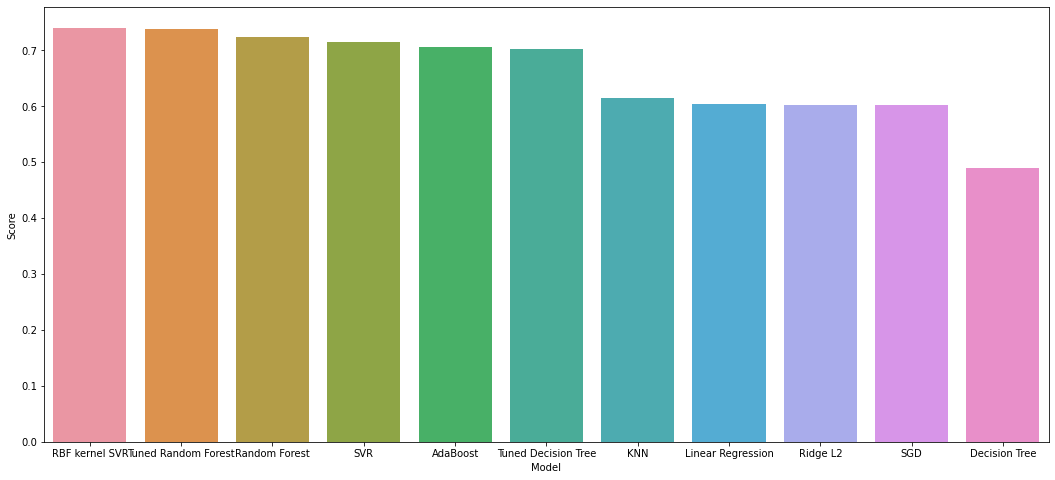

In [227]:
plt.figure(figsize=(18,8))
compare = compare.sort_values(by="Score", ascending=False)
sns.barplot(x = "Model", y = "Score",data = compare)

<AxesSubplot:xlabel='Model', ylabel='Mean Squared Error'>

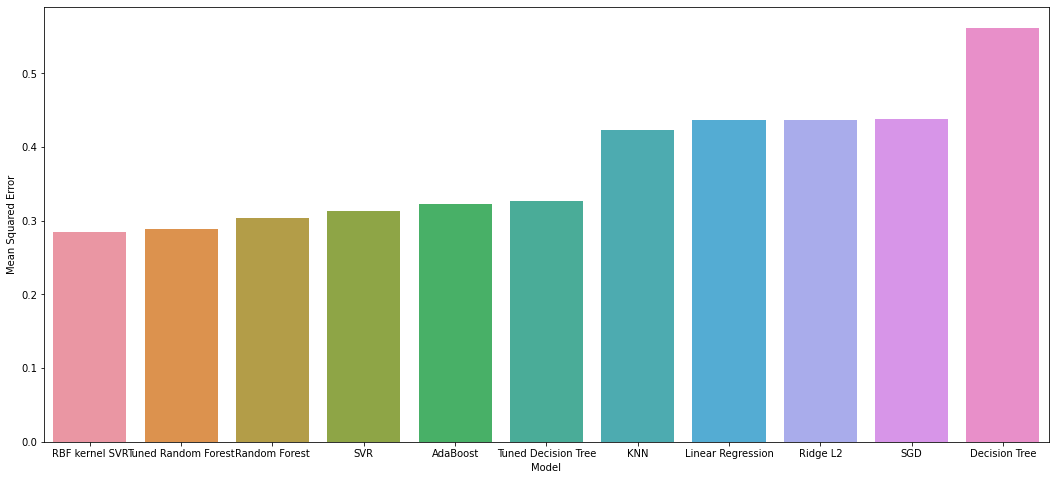

In [228]:
plt.figure(figsize=(18,8))
compare = compare.sort_values(by="Mean Squared Error", ascending=True)
sns.barplot(x = "Model", y = "Mean Squared Error",data = compare)

<AxesSubplot:xlabel='Model', ylabel='Root Mean Squared Error'>

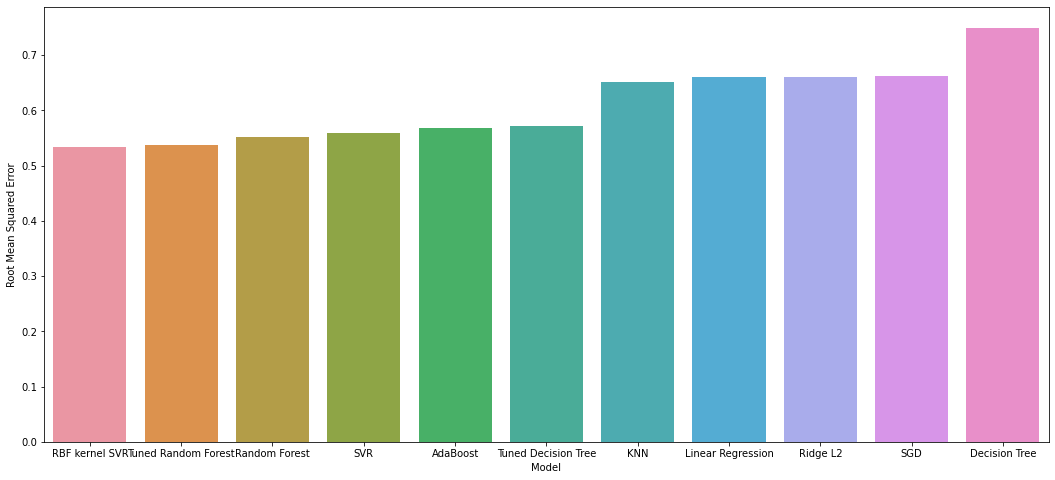

In [230]:
plt.figure(figsize=(18,8))
compare = compare.sort_values(by="Root Mean Squared Error", ascending=True)
sns.barplot(x = "Model", y = "Root Mean Squared Error",data = compare)

In [ ]:
import plotly.express as px
fig = px.bar_polar(df, r="GItem_type", theta="GItem_type", color="Item_Outlet_Sales",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                   title="Part of a continuous color scale used as a discrete sequence"
                  )
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
z = df.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()